In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from preprocessing import pregame
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

In [6]:
df_ = pd.read_csv("diabetes_prediction_dataset.csv")

In [7]:
df = df_.copy()

In [8]:
df["diabetes"].value_counts()

diabetes
0    25168
1     2360
Name: count, dtype: int64

Can use the Logistic Regression since out prediction should be in a Binary value. 1 or 0. Yes diabetes or No diabetes.

No need to apply standard scaler when using logistic regression because it is not a distance based algorithm. (For KNN or Gradient decent it is more relevant)

In [9]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
pre = pregame(df)

In [11]:
df['gender'].replace({'Female': 1, 'Male': 0}, inplace = True)

In [12]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0


In [13]:
df = pd.get_dummies(df, columns=['smoking_history'])

In [14]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,80.0,0,1,25.19,6.6,140,0,False,False,False,False,True,False
1,1,54.0,0,0,27.32,6.6,80,0,True,False,False,False,False,False
2,0,28.0,0,0,27.32,5.7,158,0,False,False,False,False,True,False
3,1,36.0,0,0,23.45,5.0,155,0,False,True,False,False,False,False
4,0,76.0,1,1,20.14,4.8,155,0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27523,1,28.0,0,0,40.10,6.0,90,0,True,False,False,False,False,False
27524,0,31.0,0,0,19.81,6.2,155,0,False,True,False,False,False,False
27525,0,14.0,0,0,27.32,6.5,130,0,False,False,False,False,True,False
27526,0,53.0,0,0,29.40,6.6,155,0,False,False,False,False,True,False


In [15]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,27528.000000,27528.000000,27528.000000,27528.000000,27528.000000,27528.000000,27528.000000
mean,42.005618,0.077194,0.038797,27.369845,5.524415,138.018817,0.085731
std,22.498018,0.266904,0.193114,6.682188,1.078814,40.993501,0.279971
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.710000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.610000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [16]:
df.gender.value_counts()

gender
1        16178
0        11345
Other        5
Name: count, dtype: int64

In [17]:
df = df[df['gender'] != 'Other']

Model Training

In [18]:
y= df['diabetes']
X = df.drop('diabetes', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_proba = reg.predict_proba(X_test)[::,1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9608816761535667


In [21]:
cm = confusion_matrix(y_test, y_pred)

In [22]:
cm

array([[7497,   54],
       [ 269,  437]])

In [23]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      7551
           1       0.89      0.62      0.73       706

    accuracy                           0.96      8257
   macro avg       0.93      0.81      0.85      8257
weighted avg       0.96      0.96      0.96      8257



In [24]:
print(len(X_train))
print(len(y_train))

19266
19266


In [25]:
df.corr()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
gender,1.000000,0.028182,-0.015783,-0.079028,0.021456,-0.019644,-0.015295,-0.036963,-0.054823,-0.032646,-0.009013,-0.055655,0.105158,0.014082
age,0.028182,1.000000,0.250531,0.233108,0.329510,0.105229,0.112297,0.258177,-0.282887,0.025526,0.068209,0.218687,0.068519,0.071421
hypertension,-0.015783,0.250531,1.000000,0.106105,0.147473,0.087313,0.079884,0.194848,-0.117203,0.022053,0.025342,0.073815,0.045609,0.004709
heart_disease,-0.079028,0.233108,0.106105,1.000000,0.053690,0.069940,0.074654,0.171624,-0.052434,0.011335,0.040506,0.093833,-0.033884,0.010324
bmi,0.021456,0.329510,0.147473,0.053690,1.000000,0.086906,0.090626,0.222859,-0.222560,0.054876,0.045980,0.111508,0.086444,0.030154
HbA1c_level,-0.019644,0.105229,0.087313,0.069940,0.086906,1.000000,0.165424,0.409856,-0.051071,0.010521,0.011226,0.041755,0.010732,0.007209
blood_glucose_level,-0.015295,0.112297,0.079884,0.074654,0.090626,0.165424,1.000000,0.417670,-0.053585,0.018990,0.005367,0.042110,0.010925,0.005952
diabetes,-0.036963,0.258177,0.194848,0.171624,0.222859,0.409856,0.417670,1.000000,-0.121507,0.017577,0.029985,0.097935,0.029207,0.017872
smoking_history_No Info,-0.054823,-0.282887,-0.117203,-0.052434,-0.222560,-0.051071,-0.053585,-0.121507,1.000000,-0.235622,-0.149700,-0.240445,-0.549454,-0.192145
smoking_history_current,-0.032646,0.025526,0.022053,0.011335,0.054876,0.010521,0.018990,0.017577,-0.235622,1.000000,-0.064594,-0.103750,-0.237085,-0.082909


In [26]:
# Plotting the results
def plot_logistic_regression_results(y_test, y_proba):

    #first sort the probabilities and the corresponding actual outcomes
    sorted_indices = np.argsort(y_proba)
    sorted_proba = y_proba[sorted_indices]
    sorted_actual = y_test.iloc[sorted_indices]

    #plot
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(sorted_proba)), sorted_proba, c=sorted_actual, cmap='coolwarm', label='Predicted probability')
    plt.plot(sorted_proba, color='black', linewidth=2, label='S-curve')
    plt.title('Logistic Regression Predicted Probabilities')
    plt.xlabel('Sorted index')
    plt.ylabel('Predicted probability of diabetes')
    plt.colorbar(label='Actual outcome (0 = no diabetes, 1 = diabetes)')
    plt.legend()
    plt.show()

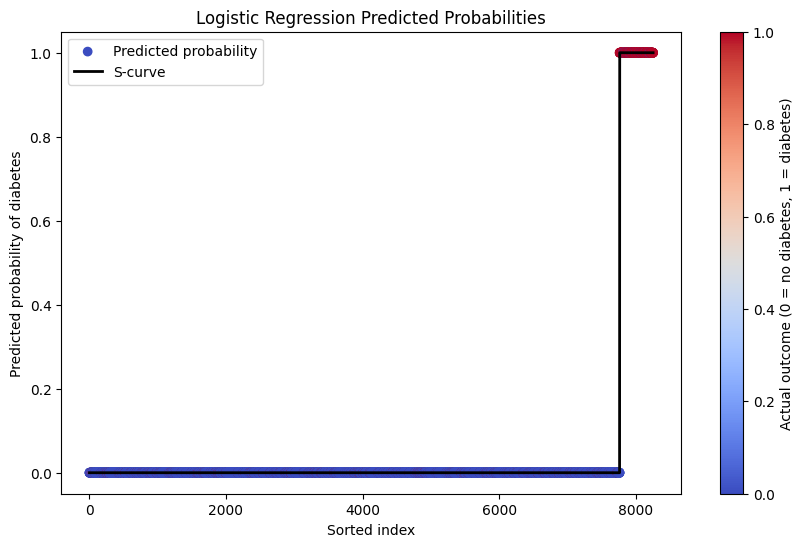

In [27]:
plot_logistic_regression_results(y_test, y_pred)

In [35]:
y_pred_proba.shape

(8257,)

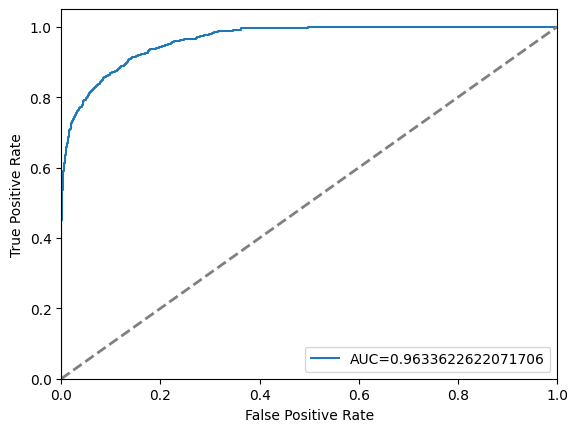

In [39]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2) #Dotted line showing area under roc
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The strong curved line at the top left corner of the graph indicates a strong model that does well at classifying the data. We calculate the area under the curve (AUC) to quantify the models performance. The value is between 1 and 0. closer to 1 equaly better performance.
